In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

### Results

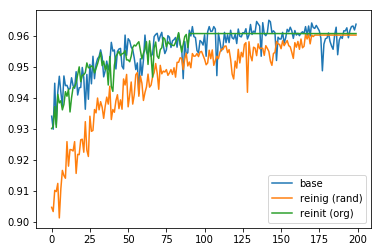

In [9]:
START= 20
END = 220

init_df = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-1-init.csv')
rand_df = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-1-rand-init.csv')
lt_df = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-1-reinit.csv')

orig_val = np.array(init_df['val_accs'])
rand_val = np.array(rand_df['val_accs'])
lt_val = np.array(lt_df['val_accs'])

rand_filled = np.concatenate((rand_val, np.repeat(rand_val[-1], len(orig_val) - len(rand_val))))
lt_filled = np.concatenate((lt_val, np.repeat(lt_val[-1], len(orig_val) - len(lt_val))))

orig_val = orig_val[START:END]
rand_filled = rand_filled[START:END]
lt_filled = lt_filled[START:END]

pd.DataFrame({'base': orig_val, 
              'reinit (org)': lt_filled,
              'reinig (rand)': rand_filled}).plot()

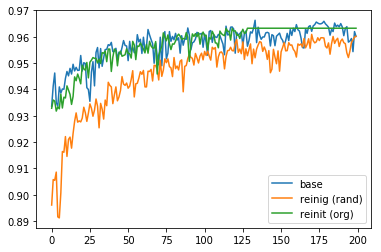

In [10]:
START= 20
END = 220

init_df = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-2-init.csv')
rand_df = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-2-rand-init.csv')
lt_df = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-2-reinit.csv')

orig_val = np.array(init_df['val_accs'])
rand_val = np.array(rand_df['val_accs'])
lt_val = np.array(lt_df['val_accs'])

rand_filled = np.concatenate((rand_val, np.repeat(rand_val[-1], len(orig_val) - len(rand_val))))
lt_filled = np.concatenate((lt_val, np.repeat(lt_val[-1], len(orig_val) - len(lt_val))))

orig_val = orig_val[START:END]
rand_filled = rand_filled[START:END]
lt_filled = lt_filled[START:END]

pd.DataFrame({'base': orig_val, 
              'reinit (org)': lt_filled,
              'reinig (rand)': rand_filled}).plot()

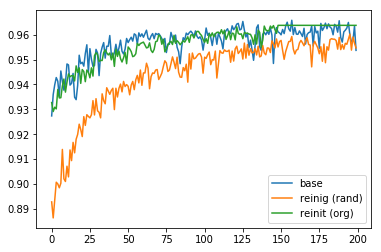

In [11]:
START= 20
END = 220

init_df = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-3-init.csv')
rand_df = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-3-rand-init.csv')
lt_df = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-3-reinit.csv')

orig_val = np.array(init_df['val_accs'])
rand_val = np.array(rand_df['val_accs'])
lt_val = np.array(lt_df['val_accs'])

rand_filled = np.concatenate((rand_val, np.repeat(rand_val[-1], len(orig_val) - len(rand_val))))
lt_filled = np.concatenate((lt_val, np.repeat(lt_val[-1], len(orig_val) - len(lt_val))))

orig_val = orig_val[START:END]
rand_filled = rand_filled[START:END]
lt_filled = lt_filled[START:END]

pd.DataFrame({'base': orig_val, 
              'reinit (org)': lt_filled,
              'reinig (rand)': rand_filled}).plot()

In [12]:
init_df_1 = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-1-init.csv')
init_df_2 = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-2-init.csv')
init_df_3 = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-3-init.csv')

reinit_df_1 = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-1-reinit.csv')
reinit_df_2 = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-2-reinit.csv')
reinit_df_3 = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-3-reinit.csv')

rand_df_1 = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-1-rand-init.csv')
rand_df_2 = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-2-rand-init.csv')
rand_df_3 = pd.read_csv('./experiment_data/iterative-pruning/lt-mnist-3-rand-init.csv')

In [13]:
def pad_with_last(x, pad_len):
    last = x[-1]
    n_pad = pad_len - len(x)
    rest = np.repeat(last, n_pad)
    return np.concatenate((x, rest))

In [14]:
START=20
END=250
N=3

val_init_1 = np.array(init_df_1['val_accs'])
val_init_2 = np.array(init_df_2['val_accs'])
val_init_3 = np.array(init_df_3['val_accs'])

val_reinit_1 = np.array(reinit_df_1['val_accs'])
val_reinit_2 = np.array(reinit_df_2['val_accs'])
val_reinit_3 = np.array(reinit_df_3['val_accs'])

val_reinit_1 = pad_with_last(val_reinit_1, END)
val_reinit_2 = pad_with_last(val_reinit_2, END)
val_reinit_3 = pad_with_last(val_reinit_3, END)

val_rand_1 = np.array(rand_df_1['val_accs'])
val_rand_2 = np.array(rand_df_2['val_accs'])
val_rand_3 = np.array(rand_df_3['val_accs'])

val_rand_1 = pad_with_last(val_rand_1, END)
val_rand_2 = val_rand_2[:END]
val_rand_3 = val_rand_3[:END]
# val_rand_2 = pad_with_last(val_rand_2, END)
# val_rand_3 = pad_with_last(val_rand_3, END)

In [15]:
init_acc_matrix = np.array([val_init_1, val_init_2, val_init_3]).transpose()
init_err_low = init_acc_matrix.min(axis=1)
init_err_high = init_acc_matrix.max(axis=1)
init_errs = init_err_high - init_err_low
init_avg = init_acc_matrix.mean(axis=1)
init_smoothed_avg = np.convolve(init_avg, np.ones((N,))/N, mode='valid')
init_smoothed_errs = np.convolve(init_errs, np.ones((N,))/N, mode='valid')


reinit_acc_matrix = np.array([val_reinit_1, val_reinit_2, val_reinit_3]).transpose()
reinit_err_low = reinit_acc_matrix.min(axis=1)
reinit_err_high = reinit_acc_matrix.max(axis=1)
reinit_errs = reinit_err_high - reinit_err_low
reinit_avg = reinit_acc_matrix.mean(axis=1)
reinit_smoothed_avg = np.convolve(reinit_avg, np.ones((N,))/N, mode='valid')
reinit_smoothed_errs = np.convolve(reinit_errs, np.ones((N,))/N, mode='valid')

rand_acc_matrix = np.array([val_rand_1, val_rand_2, val_rand_3]).transpose()
rand_err_low = rand_acc_matrix.min(axis=1)
rand_err_high = rand_acc_matrix.max(axis=1)
rand_errs = rand_err_high - rand_err_low
rand_avg = rand_acc_matrix.mean(axis=1)
rand_smoothed_avg = np.convolve(rand_avg, np.ones((N,))/N, mode='valid')
rand_smoothed_errs = np.convolve(rand_errs, np.ones((N,))/N, mode='valid')

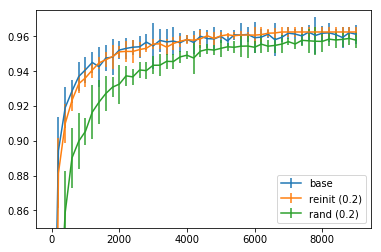

In [16]:
x = np.arange(len(val_init_1[START:END]))
err_idx = np.arange(start=0, stop=len(init_avg[START:END]), step=5)
nx = err_idx*40
# plt.plot(nx, init_smoothed_avg[err_idx], label='base')
plt.errorbar(nx, init_smoothed_avg[err_idx], yerr=init_smoothed_errs[err_idx], label='base')

# plt.plot(nx, reinit_smoothed_avg[err_idx], label='reinit (0.2))')
plt.errorbar(nx, reinit_smoothed_avg[err_idx], yerr=reinit_smoothed_errs[err_idx], label='reinit (0.2)')

# plt.plot(nx, rand_smoothed_avg[err_idx], label='rand (0.2)')
plt.errorbar(nx, rand_smoothed_avg[err_idx], yerr=rand_smoothed_errs[err_idx], label='rand (0.2)')

plt.ylim((0.85,.975))
plt.legend()
plt.show()

In [20]:
init_df = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-25-init.csv')
rand_df = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-25-rand-init.csv')
lt_df   = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-25-reinit.csv')

In [21]:
init_val = np.array(init_df['val_accs'])
lt_val = np.array(lt_df['val_accs'])
rand_val = np.array(rand_df['val_accs'])

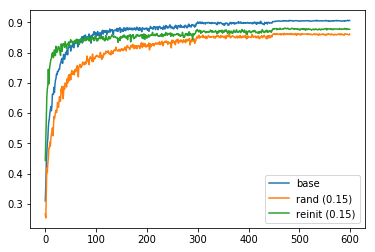

In [22]:
pd.DataFrame({
    'base': init_val,
    'reinit (0.15)': lt_val,
    'rand (0.15)': rand_val
}).plot()

718

In [274]:
val_losses.min()

0.024509266088716685

In [268]:
val_losses = np.array(reinit_df_1['val_losses'])

In [269]:
val_losses.argmin()

103

In [270]:
len(val_losses)

111

In [271]:
val_losses.min()

0.053692602226510636

In [19]:
lt_val.max()

0.7357421875

In [20]:
init_val.max()

0.7908203125

In [21]:
rand_val.max()

0.66767578125

In [10]:
init_df = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-45-init.csv')
np.array(init_df['val_accs'])[np.array(init_df['val_losses']).argmin()]

0.76572265625

In [11]:
np.array(init_df['val_losses']).argmin()

41

In [12]:
lt_df = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-45-reinit.csv')
rand_df = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-45-rand-init.csv')
np.array(lt_df['val_accs'])[np.array(lt_df['val_losses']).argmin()]

0.7650390625

In [13]:
np.array(lt_df['val_losses']).argmin()

33

Text(0,0.5,'Accuracy (val)')

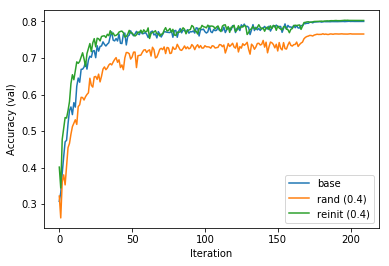

In [38]:
ax = pd.DataFrame({
    'base': np.array(init_df['val_accs']),
    'reinit (0.4)': np.array(lt_df['val_accs']),
    'rand (0.4)': np.array(rand_df['val_accs']),
}).plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy (val)")

In [15]:
init_df = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-6-init.csv')
np.array(init_df['val_accs'])[np.array(init_df['val_losses']).argmin()]

0.8758

In [16]:
np.array(init_df['val_losses']).argmin()

84

In [ ]:
lt_df_6 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/tmp/lt-cifar-resnet18-6-init.csv')
# lt_df_7 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-7-init.csv')
lt_df_8 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-8-init.csv')
lt_df_9 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-9-reinit.csv')
# lt_df_30 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-30-reinit.csv')
# lt_df_40 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-45-reinit.csv')
# lt_df_50 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-50-reinit.csv')
# lt_df_70 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-70-reinit.csv')
# rand_df = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-30-rand-init.csv')
# np.array(lt_df['val_accs'])[np.array(lt_df['val_losses']).argmin()]

rand_df_6 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-6-reinit.csv')
rand_df_7 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-6-reinit.csv')
rand_df_8 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-6-reinit.csv')
rand_df_9 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-6-reinit.csv')
# rand_df_30 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-30-rand-init.csv')
# rand_df_40 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/lt-cifar-resnet18-45-rand-init.csv')

In [232]:
init_df = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-5-init.csv')

lt_df_2 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-2-reinit.csv')
lt_df_5 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-5-reinit.csv')
lt_df_6 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-6-reinit.csv')
lt_df_7 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-7-reinit.csv')
lt_df_8 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-8-reinit.csv')
lt_df_9 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-9-reinit.csv')
lt_df_10 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-10-reinit.csv')
lt_df_12 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-12-reinit.csv')
lt_df_15 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-15-reinit.csv')

rand_df_7 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-9-rand-init.csv')

In [6]:
def ma(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

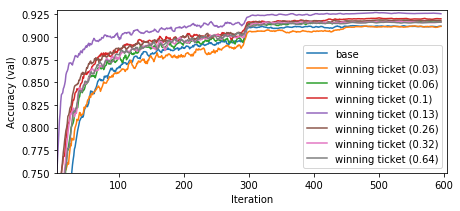

In [233]:
SMOOTH=5
cifar_iterative_resnet = pd.DataFrame({
    'base': ma(np.array(init_df['val_accs']), SMOOTH),
    'winning ticket (0.64)': ma(np.array(lt_df_2['val_accs']), SMOOTH),
    'winning ticket (0.32)': ma(np.array(lt_df_5['val_accs']), SMOOTH),
    'winning ticket (0.26)': ma(np.array(lt_df_6['val_accs']), SMOOTH),
#     'winning ticket (0.16)': ma(np.array(lt_df_8['val_accs']), SMOOTH),
    'winning ticket (0.13)': ma(np.array(lt_df_9['val_accs']), SMOOTH),
    'winning ticket (0.1)': ma(np.array(lt_df_10['val_accs']), SMOOTH),
    'winning ticket (0.06)': ma(np.array(lt_df_12['val_accs']), SMOOTH),
    'winning ticket (0.03)': ma(np.array(lt_df_15['val_accs']), SMOOTH),
#     'random (0.13)': ma(np.array(rand_df_7['val_accs']), SMOOTH),
})
ax = cifar_iterative_resnet.plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy (val)")
plt.ylim((0.75,.93))
plt.xlim((5,605))
plt.rcParams["figure.figsize"] = [20, 5]

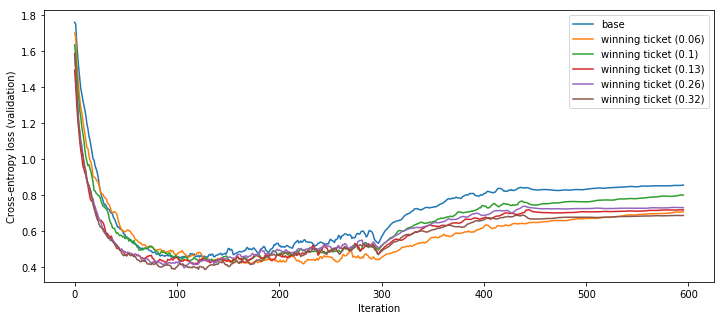

In [26]:
SMOOTH=5
cifar_iterative_resnet = pd.DataFrame({
    'base': ma(np.array(init_df['val_losses']), SMOOTH),
    'winning ticket (0.32)': ma(np.array(lt_df_5['val_losses']), SMOOTH),
    'winning ticket (0.26)': ma(np.array(lt_df_6['val_losses']), SMOOTH),
#     'winning ticket (0.16)': ma(np.array(lt_df_8['val_losses']), SMOOTH),
    'winning ticket (0.13)': ma(np.array(lt_df_9['val_losses']), SMOOTH),
    'winning ticket (0.1)': ma(np.array(lt_df_10['val_losses']), SMOOTH),
    'winning ticket (0.06)': ma(np.array(lt_df_12['val_losses']), SMOOTH),
#     'random (0.13)': ma(np.array(rand_df_7['val_losses']), SMOOTH),
})
ax = cifar_iterative_resnet.plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Cross-entropy loss (validation)")
# plt.ylim((0.75,.93))
# plt.xlim((5,605))
plt.rcParams["figure.figsize"] = [20, 5]

In [15]:
cifar_iterative_resnet.tail()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,base
591,0.91284,0.91846,0.91240,0.91848,0.91380,0.91080,0.91094,0.91076,0.91358,0.90496,0.91034,0.90364,0.89870,0.89796,0.88598,0.90660
592,0.91282,0.91832,0.91248,0.91860,0.91368,0.91086,0.91096,0.91084,0.91352,0.90498,0.91038,0.90358,0.89864,0.89816,0.88608,0.90666
593,0.91286,0.91814,0.91264,0.91864,0.91376,0.91094,0.91090,0.91078,0.91356,0.90488,0.91030,0.90366,0.89862,0.89830,0.88614,0.90680
594,0.91286,0.91792,0.91274,0.91862,0.91376,0.91100,0.91076,0.91086,0.91344,0.90486,0.91042,0.90368,0.89848,0.89840,0.88608,0.90690
595,0.91294,0.91780,0.91280,0.91862,0.91392,0.91102,0.91066,0.91088,0.91342,0.90486,0.91062,0.90394,0.89864,0.89824,0.88606,0.90670


In [67]:
cifar_iterative_resnet.tail()
data_matrix = cifar_iterative_resnet.as_matrix()
data_matrix[-1]

array([0.91294, 0.9178 , 0.9128 , 0.91862, 0.91392, 0.91102, 0.91066,
       0.91088, 0.91342, 0.90486, 0.91062, 0.90394, 0.89864, 0.89824,
       0.88606, 0.9067 ])

In [30]:
data_matrix.shape

(596, 16)

In [68]:
# data_matrix = cifar_iterative_resnet.as_matrix()
# data_matrix[-1]
base = data_matrix[:,-1]
base = base.reshape(596, 1)

others = data_matrix[:,:-1]

data_matrix = np.append(base, others, axis=1)
data_matrix.shape
data_matrix_128 = data_matrix

In [22]:
a = np.arange(0,15)
a[:-1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

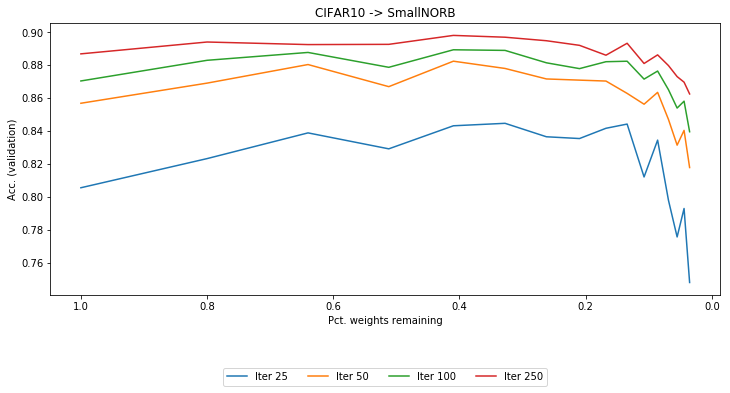

In [69]:
ax = plt.subplot()
x = [0.8**i for i in range(16)]
# print(x)
# x = np.array(list(reversed(x)))
# x = np.arange(0,16)
indices = [50, 100, 250]
idx = 0
ax.plot(x, data_matrix[50], label='Iter 25')
ax.plot(x, data_matrix[100], label='Iter 50')
ax.plot(x, data_matrix[150], label='Iter 100')
ax.plot(x, data_matrix[250], label='Iter 250')
ax.invert_xaxis()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
          fancybox=True, shadow=False, ncol=5)
plt.title('CIFAR10 -> SmallNORB')
plt.ylabel('Acc. (validation)')
plt.xlabel('Pct. weights remaining')
plt.rcParams["figure.figsize"] = [10,5]
plt.show()
# for col in ax:
#     if idx == 0:
#         col.set_ylabel('Accuracy (validation)')
#     if idx == 1:
#         col.set_xlabel('Iteration')
#     col.plot(x,data_matrix[indices[idx]], label=idx)
# #     col.plot(x,data_matrix[indices[idx] * 2], label=idx+1)
#     col.invert_xaxis()
#     idx += 1
# plt.legend()


In [65]:
# test-all-2-2-4-reinit.csv
init_df = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-init.csv')
lt_df_1 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-1-reinit.csv')
lt_df_2 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-2-reinit.csv')
lt_df_3 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-3-reinit.csv')
lt_df_4 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-4-reinit.csv')
lt_df_5 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-5-reinit.csv')
lt_df_6 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-6-reinit.csv')
lt_df_7 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-7-reinit.csv')
lt_df_8 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-8-reinit.csv')
lt_df_9 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-9-reinit.csv')
lt_df_10 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-10-reinit.csv')
lt_df_11 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-11-reinit.csv')
lt_df_12 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-12-reinit.csv')
lt_df_13 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-13-reinit.csv')
lt_df_14 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-14-reinit.csv')
lt_df_15 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-2-15-reinit.csv')



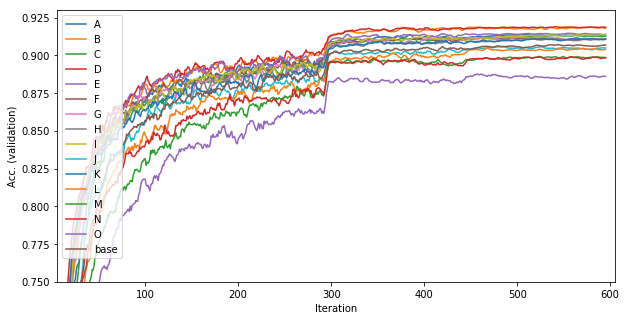

In [66]:
SMOOTH=5
cifar_iterative_resnet = pd.DataFrame({
    'base': ma(np.array(init_df['val_accs']), SMOOTH),
    'A': ma(np.array(lt_df_1['val_accs']), SMOOTH),
    'B': ma(np.array(lt_df_2['val_accs']), SMOOTH),
    'C': ma(np.array(lt_df_3['val_accs']), SMOOTH),
    'D': ma(np.array(lt_df_4['val_accs']), SMOOTH),
    'E': ma(np.array(lt_df_5['val_accs']), SMOOTH),
    'F': ma(np.array(lt_df_6['val_accs']), SMOOTH),
    'G': ma(np.array(lt_df_7['val_accs']), SMOOTH),
    'H': ma(np.array(lt_df_8['val_accs']), SMOOTH),
    'I': ma(np.array(lt_df_9['val_accs']), SMOOTH),
    'J': ma(np.array(lt_df_10['val_accs']), SMOOTH),
    'K': ma(np.array(lt_df_11['val_accs']), SMOOTH),
    'L': ma(np.array(lt_df_12['val_accs']), SMOOTH),
    'M': ma(np.array(lt_df_13['val_accs']), SMOOTH),
    'N': ma(np.array(lt_df_14['val_accs']), SMOOTH),
    'O': ma(np.array(lt_df_15['val_accs']), SMOOTH),

})
ax = cifar_iterative_resnet.plot()
# ax.set_title('CIFAR10 -> FashionMNIST')
ax.set_xlabel("Iteration")
ax.set_ylabel("Acc. (validation)")
plt.ylim((0.75,.93))
plt.xlim((5,605))
plt.rcParams["figure.figsize"] = [12, 5]

## BATCH SIZE EXPRS

In [70]:
init_df = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-init.csv')
lt_df_1 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-1-reinit.csv')
lt_df_2 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-2-reinit.csv')
lt_df_3 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-3-reinit.csv')
lt_df_4 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-4-reinit.csv')
lt_df_5 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-5-reinit.csv')
lt_df_6 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-6-reinit.csv')
lt_df_7 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-7-reinit.csv')
lt_df_8 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-8-reinit.csv')
lt_df_9 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-9-reinit.csv')
lt_df_10 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-10-reinit.csv')
lt_df_11 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-11-reinit.csv')
lt_df_12 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-12-reinit.csv')
lt_df_13 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-13-reinit.csv')
lt_df_14 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-14-reinit.csv')
lt_df_15 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-64-15-reinit.csv')




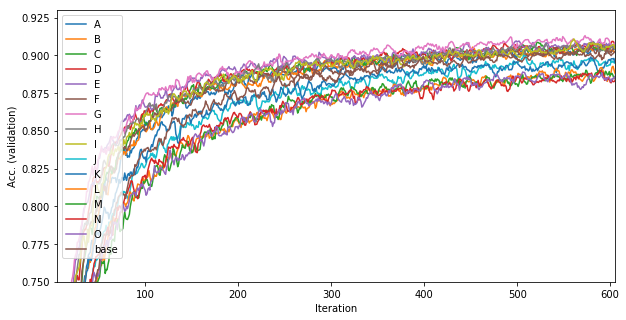

In [71]:
SMOOTH=5
cifar_iterative_resnet = pd.DataFrame({
    'base': ma(np.array(init_df['val_accs']), SMOOTH),
    'A': ma(np.array(lt_df_1['val_accs']), SMOOTH),
    'B': ma(np.array(lt_df_2['val_accs']), SMOOTH),
    'C': ma(np.array(lt_df_3['val_accs']), SMOOTH),
    'D': ma(np.array(lt_df_4['val_accs']), SMOOTH),
    'E': ma(np.array(lt_df_5['val_accs']), SMOOTH),
    'F': ma(np.array(lt_df_6['val_accs']), SMOOTH),
    'G': ma(np.array(lt_df_7['val_accs']), SMOOTH),
    'H': ma(np.array(lt_df_8['val_accs']), SMOOTH),
    'I': ma(np.array(lt_df_9['val_accs']), SMOOTH),
    'J': ma(np.array(lt_df_10['val_accs']), SMOOTH),
    'K': ma(np.array(lt_df_11['val_accs']), SMOOTH),
    'L': ma(np.array(lt_df_12['val_accs']), SMOOTH),
    'M': ma(np.array(lt_df_13['val_accs']), SMOOTH),
    'N': ma(np.array(lt_df_14['val_accs']), SMOOTH),
    'O': ma(np.array(lt_df_15['val_accs']), SMOOTH),

})
ax = cifar_iterative_resnet.plot()
# ax.set_title('CIFAR10 -> FashionMNIST')
ax.set_xlabel("Iteration")
ax.set_ylabel("Acc. (validation)")
plt.ylim((0.75,.93))
plt.xlim((5,605))
plt.rcParams["figure.figsize"] = [12, 5]

In [72]:
data_matrix = cifar_iterative_resnet.as_matrix()

base = data_matrix[:,-1]
base = base.reshape(696, 1)

others = data_matrix[:,:-1]

data_matrix = np.append(base, others, axis=1)
data_matrix_64 = data_matrix
# plt.plot(data_matrix[-1])

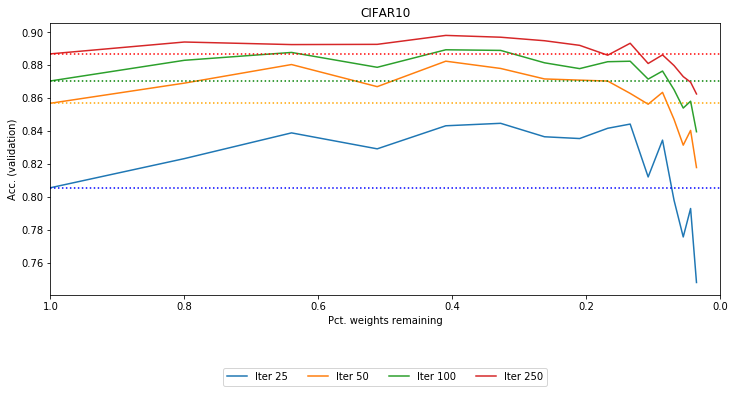

In [253]:
ax = plt.subplot()
x = [0.8**i for i in range(16)]
# print(x)
# x = np.array(list(reversed(x)))
# x = np.arange(0,16)
indices = [50, 100, 250]
idx = 0
ax.plot(x, data_matrix_128[50], label='Iter 25')
ax.axhline(data_matrix_128[50,0], linestyle=':', color='b')
ax.plot(x, data_matrix_128[100], label='Iter 50')
ax.axhline(data_matrix_128[100,0], linestyle=':', color='orange')
ax.plot(x, data_matrix_128[150], label='Iter 100')
ax.axhline(data_matrix_128[150,0], linestyle=':', color='g')
ax.plot(x, data_matrix_128[250], label='Iter 250')
ax.axhline(data_matrix_128[250,0], linestyle=':', color='r')
ax.invert_xaxis()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
          fancybox=True, shadow=False, ncol=5)
plt.title('CIFAR10')
plt.ylabel('Acc. (validation)')
plt.xlabel('Pct. weights remaining')
plt.rcParams["figure.figsize"] = [10,5]
plt.xlim((1,0))
plt.show()
# for col in ax:
#     if idx == 0:
#         col.set_ylabel('Accuracy (validation)')
#     if idx == 1:
#         col.set_xlabel('Iteration')
#     col.plot(x,data_matrix[indices[idx]], label=idx)
# #     col.plot(x,data_matrix[indices[idx] * 2], label=idx+1)
#     col.invert_xaxis()
#     idx += 1
# plt.legend()


In [134]:
data_matrix_128[550]

array([0.90638, 0.91326, 0.9179 , 0.9128 , 0.91868, 0.91412, 0.9105 ,
       0.9108 , 0.91006, 0.91314, 0.90508, 0.90986, 0.90402, 0.89892,
       0.89806, 0.88518])

In [74]:
init_df = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-init.csv')
lt_df_1 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-1-reinit.csv')
lt_df_2 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-2-reinit.csv')
lt_df_3 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-3-reinit.csv')
lt_df_4 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-4-reinit.csv')
lt_df_5 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-5-reinit.csv')
lt_df_6 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-6-reinit.csv')
lt_df_7 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-7-reinit.csv')
lt_df_8 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-8-reinit.csv')
lt_df_9 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-9-reinit.csv')
lt_df_10 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-10-reinit.csv')
lt_df_11 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-11-reinit.csv')
lt_df_12 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-12-reinit.csv')
lt_df_13 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-13-reinit.csv')
lt_df_14 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-14-reinit.csv')
lt_df_15 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/test-all-32-15-reinit.csv')

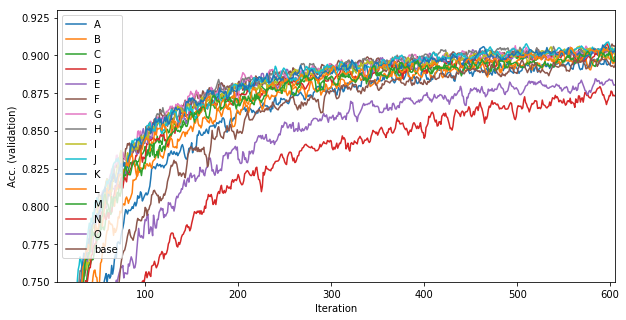

In [75]:
SMOOTH=5
cifar_iterative_resnet = pd.DataFrame({
    'base': ma(np.array(init_df['val_accs']), SMOOTH),
    'A': ma(np.array(lt_df_1['val_accs']), SMOOTH),
    'B': ma(np.array(lt_df_2['val_accs']), SMOOTH),
    'C': ma(np.array(lt_df_3['val_accs']), SMOOTH),
    'D': ma(np.array(lt_df_4['val_accs']), SMOOTH),
    'E': ma(np.array(lt_df_5['val_accs']), SMOOTH),
    'F': ma(np.array(lt_df_6['val_accs']), SMOOTH),
    'G': ma(np.array(lt_df_7['val_accs']), SMOOTH),
    'H': ma(np.array(lt_df_8['val_accs']), SMOOTH),
    'I': ma(np.array(lt_df_9['val_accs']), SMOOTH),
    'J': ma(np.array(lt_df_10['val_accs']), SMOOTH),
    'K': ma(np.array(lt_df_11['val_accs']), SMOOTH),
    'L': ma(np.array(lt_df_12['val_accs']), SMOOTH),
    'M': ma(np.array(lt_df_13['val_accs']), SMOOTH),
    'N': ma(np.array(lt_df_14['val_accs']), SMOOTH),
    'O': ma(np.array(lt_df_15['val_accs']), SMOOTH),

})
ax = cifar_iterative_resnet.plot()
# ax.set_title('CIFAR10 -> FashionMNIST')
ax.set_xlabel("Iteration")
ax.set_ylabel("Acc. (validation)")
plt.ylim((0.75,.93))
plt.xlim((5,605))
plt.rcParams["figure.figsize"] = [12, 5]

In [76]:
data_matrix = cifar_iterative_resnet.as_matrix()

base = data_matrix[:,-1]
base = base.reshape(746, 1)

others = data_matrix[:,:-1]

data_matrix = np.append(base, others, axis=1)
data_matrix.shape
data_matrix_32 = data_matrix
# plt.plot(data_matrix[-1])

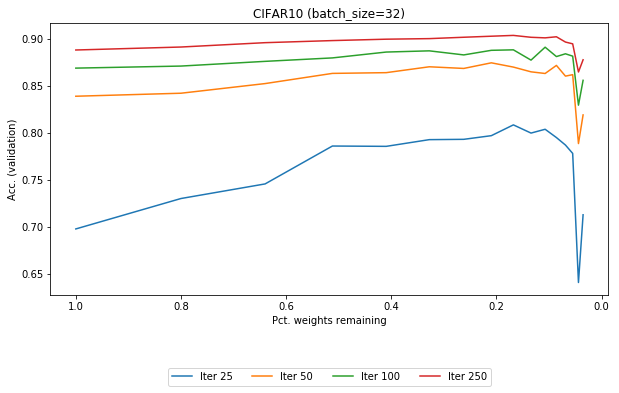

In [85]:
ax = plt.subplot()
x = [0.8**i for i in range(16)]
# print(x)
# x = np.array(list(reversed(x)))
# x = np.arange(0,16)
indices = [50, 100, 250]
idx = 0
ax.plot(x, data_matrix[50], label='Iter 50')
ax.plot(x, data_matrix[150], label='Iter 150')
ax.plot(x, data_matrix[250], label='Iter 250')
ax.plot(x, data_matrix[500], label='Iter 500')
ax.invert_xaxis()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
          fancybox=True, shadow=False, ncol=5)
plt.title('CIFAR10 (batch_size=32)')
plt.ylabel('Acc. (validation)')
plt.xlabel('Pct. weights remaining')
plt.rcParams["figure.figsize"] = [10,5]
plt.show()
# for col in ax:
#     if idx == 0:
#         col.set_ylabel('Accuracy (validation)')
#     if idx == 1:
#         col.set_xlabel('Iteration')
#     col.plot(x,data_matrix[indices[idx]], label=idx)
# #     col.plot(x,data_matrix[indices[idx] * 2], label=idx+1)
#     col.invert_xaxis()
#     idx += 1
# plt.legend()


In [82]:
data_matrix_128.shape

(596, 16)

In [80]:
data_matrix_32.shape

(746, 16)

In [81]:
data_matrix_64.shape

(696, 16)

In [150]:
rl_40.argmin()

61

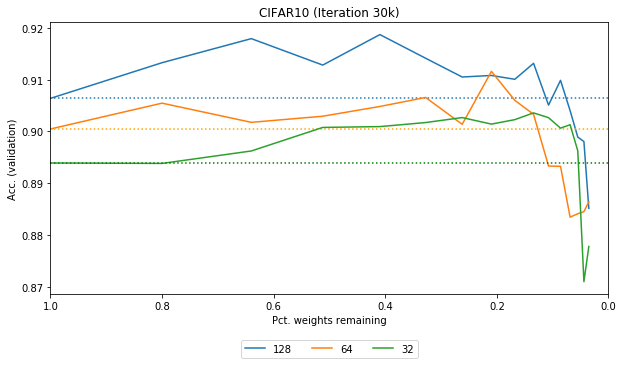

In [120]:
ax = plt.subplot()
x = [0.8**i for i in range(16)]
PLT_IDX = 550
# print(x)
# x = np.array(list(reversed(x)))
# x = np.arange(0,16)

ax.plot(x, data_matrix_128[PLT_IDX], label='128')
ax.axhline(data_matrix_128[PLT_IDX,0], linestyle=':')
ax.plot(x, data_matrix_64[PLT_IDX], label='64')
ax.axhline(data_matrix_64[PLT_IDX,0], linestyle=':', color='orange')
ax.plot(x, data_matrix_32[PLT_IDX], label='32')
ax.axhline(data_matrix_32[PLT_IDX,0], linestyle=':', color='g')
ax.invert_xaxis()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=False, ncol=5)
plt.xlim(1.0,0.0)
plt.title('CIFAR10 (Iteration 30k)')
plt.ylabel('Acc. (validation)')
plt.xlabel('Pct. weights remaining')
plt.rcParams["figure.figsize"] = [10,5]
plt.show()
# for col in ax:
#     if idx == 0:
#         col.set_ylabel('Accuracy (validation)')
#     if idx == 1:
#         col.set_xlabel('Iteration')
#     col.plot(x,data_matrix[indices[idx]], label=idx)
# #     col.plot(x,data_matrix[indices[idx] * 2], label=idx+1)
#     col.invert_xaxis()
#     idx += 1
# plt.legend()


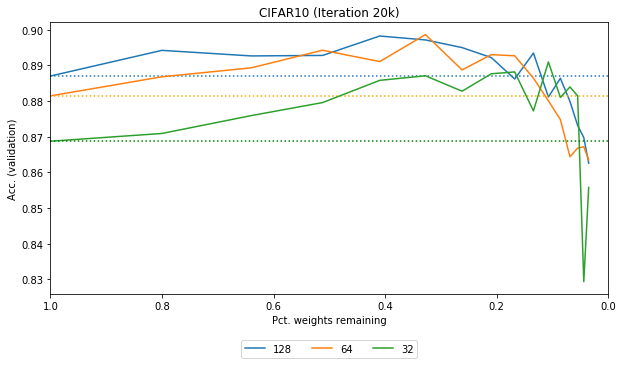

In [119]:
ax = plt.subplot()
x = [0.8**i for i in range(16)]
PLT_IDX = 250
# print(x)
# x = np.array(list(reversed(x)))
# x = np.arange(0,16)

ax.plot(x, data_matrix_128[PLT_IDX], label='128')
ax.axhline(data_matrix_128[PLT_IDX,0], linestyle=':')
ax.plot(x, data_matrix_64[PLT_IDX], label='64')
ax.axhline(data_matrix_64[PLT_IDX,0], linestyle=':', color='orange')
ax.plot(x, data_matrix_32[PLT_IDX], label='32')
ax.axhline(data_matrix_32[PLT_IDX,0], linestyle=':', color='g')
ax.invert_xaxis()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=False, ncol=5)
plt.xlim(1.0,0.0)
plt.title('CIFAR10 (Iteration 20k)')
plt.ylabel('Acc. (validation)')
plt.xlabel('Pct. weights remaining')
plt.rcParams["figure.figsize"] = [10,5]
plt.show()
# for col in ax:
#     if idx == 0:
#         col.set_ylabel('Accuracy (validation)')
#     if idx == 1:
#         col.set_xlabel('Iteration')
#     col.plot(x,data_matrix[indices[idx]], label=idx)
# #     col.plot(x,data_matrix[indices[idx] * 2], label=idx+1)
#     col.invert_xaxis()
#     idx += 1
# plt.legend()


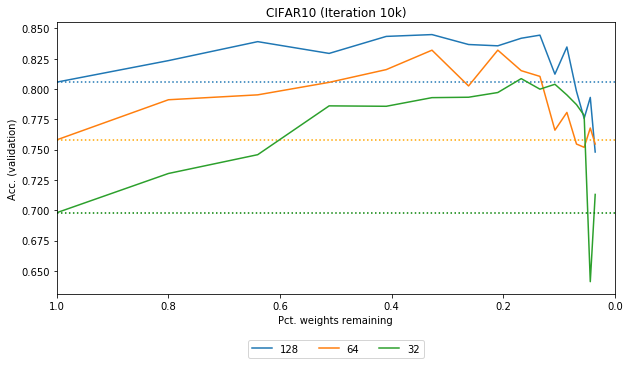

In [123]:
ax = plt.subplot()
x = [0.8**i for i in range(16)]
PLT_IDX = 50
# print(x)
# x = np.array(list(reversed(x)))
# x = np.arange(0,16)

ax.plot(x, data_matrix_128[PLT_IDX], label='128')
ax.axhline(data_matrix_128[PLT_IDX,0], linestyle=':')
ax.plot(x, data_matrix_64[PLT_IDX], label='64')
ax.axhline(data_matrix_64[PLT_IDX,0], linestyle=':', color='orange')
ax.plot(x, data_matrix_32[PLT_IDX], label='32')
ax.axhline(data_matrix_32[PLT_IDX,0], linestyle=':', color='g')
ax.invert_xaxis()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=False, ncol=5)
plt.xlim(1.0,0.0)
plt.title('CIFAR10 (Iteration 10k)')
plt.ylabel('Acc. (validation)')
plt.xlabel('Pct. weights remaining')
plt.rcParams["figure.figsize"] = [10,5]
plt.show()
# for col in ax:
#     if idx == 0:
#         col.set_ylabel('Accuracy (validation)')
#     if idx == 1:
#         col.set_xlabel('Iteration')
#     col.plot(x,data_matrix[indices[idx]], label=idx)
# #     col.plot(x,data_matrix[indices[idx] * 2], label=idx+1)
#     col.invert_xaxis()
#     idx += 1
# plt.legend()


### Transfer learning plots - NORB

In [7]:
norb_base = pd.read_csv('./experiment_data/iterative-pruning-cifar10/norb-transfer-base.csv')
norb_1 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/norb-transfer-1.csv')
norb_2 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/norb-transfer-2.csv')
norb_4 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/norb-transfer-4.csv')
norb_6 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/norb-transfer-6.csv')
norb_8 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/norb-transfer-8.csv')
norb_12 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/norb-transfer-12.csv')
norb_14 = pd.read_csv('./experiment_data/iterative-pruning-cifar10/norb-transfer-14.csv')

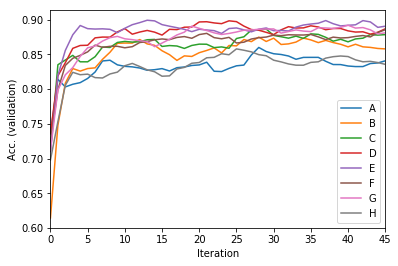

In [8]:
SMOOTH=5
norb_transfer = pd.DataFrame({
#     'base': ma(np.array(init_df['val_accs']), SMOOTH),
    'A': ma(np.array(norb_base['val_accs']), SMOOTH),
    'B': ma(np.array(norb_1['val_accs']), SMOOTH),
    'C': ma(np.array(norb_2['val_accs']), SMOOTH),
    'D': ma(np.array(norb_4['val_accs']), SMOOTH),
    'E': ma(np.array(norb_6['val_accs']), SMOOTH),
    'F': ma(np.array(norb_8['val_accs']), SMOOTH),
    'G': ma(np.array(norb_12['val_accs']), SMOOTH),
    'H': ma(np.array(norb_14['val_accs']), SMOOTH),

})
ax = norb_transfer.plot()
# ax.set_title('CIFAR10 -> FashionMNIST')
ax.set_xlabel("Iteration")
ax.set_ylabel("Acc. (validation)")
# plt.ylim((0.75,.93))
plt.xlim((0,45))
plt.rcParams["figure.figsize"] = [12, 5]

In [9]:
data_matrix_norb = norb_transfer.as_matrix()
data_matrix_norb.shape
# base = data_matrix[:,-1]
# base = base.reshape(746, 1)

# others = data_matrix[:,:-1]

# data_matrix = np.append(base, others, axis=1)
# data_matrix.shape
# data_matrix_32 = data_matrix
# # plt.plot(data_matrix[-1])

(46, 8)

In [10]:
data_matrix_norb[-1]

array([0.84077962, 0.85801595, 0.87855632, 0.88694661, 0.89069824,
       0.8855957 , 0.88115234, 0.83574219])

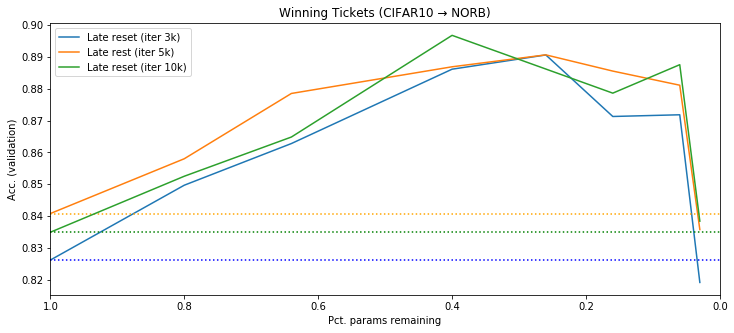

In [14]:
x = [1., 0.8, 0.64, 0.4, 0.26, 0.16, 0.06, 0.03]
ax = plt.subplot()
ax.plot(x, data_matrix_norb[16],label='Late reset (iter 3k)')
ax.axhline(data_matrix_norb[16,0], linestyle=':', color='b')
ax.plot(x, data_matrix_norb[45],label='Late rest (iter 5k)')
ax.axhline(data_matrix_norb[45,0], linestyle=':', color='orange')
ax.plot(x, data_matrix_norb[20],label='Late reset (iter 10k)')
ax.axhline(data_matrix_norb[20,0], linestyle=':', color='g')
ax.invert_xaxis()
plt.legend()
plt.xlim((1.,0.))
plt.title('Winning Tickets (CIFAR10 → NORB)')
plt.ylabel('Acc. (validation)')
plt.xlabel('Pct. params remaining')
plt.show()

In [232]:
accs_2 = np.array(norb_2['val_accs'])
losses_2 = np.array(norb_2['val_losses'])